# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

**Task:**

Binary classification

**Abstract:**

심혈관질환(CVD)은 전 세계적으로 사망률 1위인 질병으로, 매년 약 1790만 명이 사망하는데, 이는 전체 사망자의 31%를 차지한다. 심부전은 CVD에 의해 야기되는 일반적인 사건이며 이 데이터 집합에는 심부전에 의한 사망률을 예측하는 데 사용할 수 있는 12가지 Feature가 포함되어 있다. 본 프로젝트에서는 총 다섯 가지의 모델을 사용하여 사망 여부를 예측하고, 어떠한 요인이 큰 영향을 끼치는지 조기 발견을 하여 질병을 사전에 관리 또는 예방할 수 있도록 하는 것이 목표이다.

**Datasets** 

총 데이터 수: 299개

Train:Val:Test= 6:2:2

* Train dataset: 179개

* Validation dataset: 60개

* Test dataset: 60개

**Features(x):** 

(총 12개)

age: 환자의 나이 (years)

anaemia(빈혈): 적혈구나 헤모글로빈의 감소 상태 (boolean)

high blood pressure(고혈압): 고혈압 유무 (boolean)

creatinine phosphokinase (CPK, 크레아티닌 인산화효소): 혈중 CPK 효소 수치 (mcg/L)

diabetes(당뇨): 당뇨 여부 (boolean)

ejection fraction(박출률): 심장의 펌프 기능을 나타내는 지표 (percentage)

platelets(혈소판): 혈중 혈소판량 (kiloplatelets/mL)

sex(성별): 여자/남자 (binary)

serum creatinine(혈청 크레아티닌): 혈중 혈청 크레아티닌 수치 (mg/dL)

serum sodium(나트륨-혈청): 혈중 혈청 나트륨 수치 (mEq/L)

smoking(흡연): 흡연 여부 (boolean)

time: 사후관리(follow-up) 기간 (days)

**Target(y):**

death event: 환자가 follow-up 기간 중 사망한 경우 (boolean)

---

## Build Your Model

### Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import warnings

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings(action='ignore')

In [35]:
#데이터셋 불러오기
data = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.shape

(299, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Analytics on the dataset

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

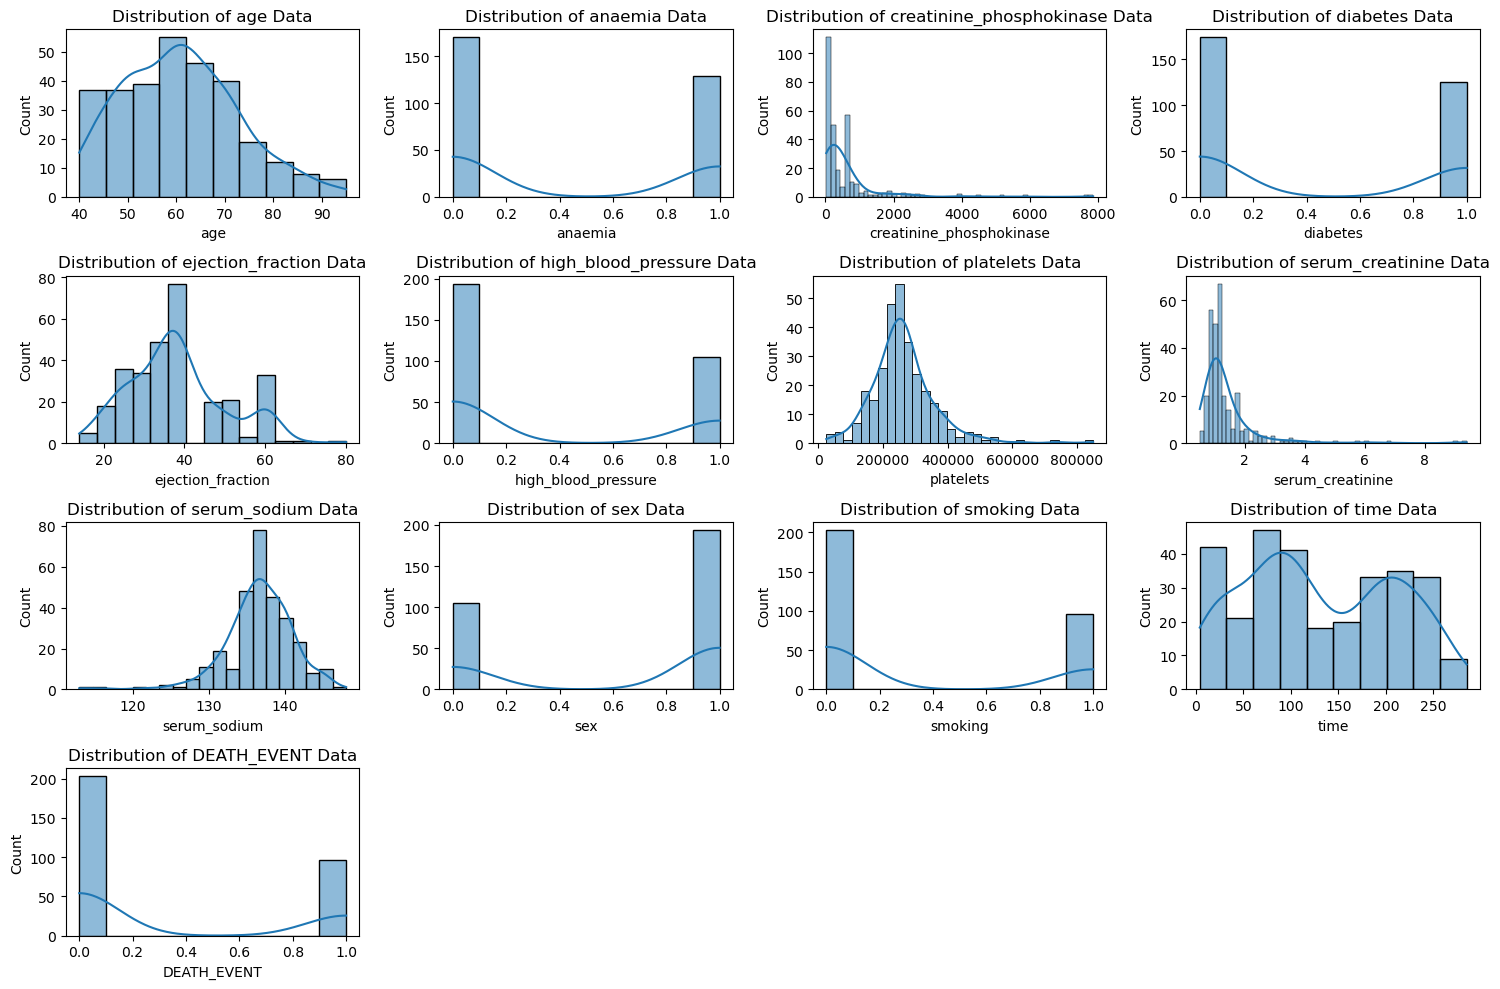

In [7]:
# mean and standard deviation of features
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1): #모든 feature에 대해 반복
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [8]:
#target variable 개수 세기
data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

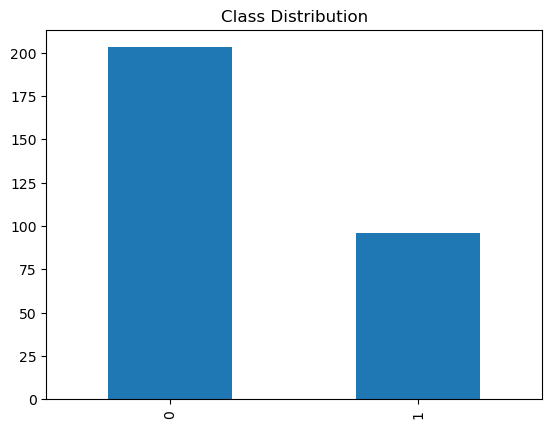

In [9]:
#Class Imbalance (class 0: 68%, class 1: 32%)
data["DEATH_EVENT"].value_counts().plot(kind="bar")
plt.title("Class Distribution");

<AxesSubplot:>

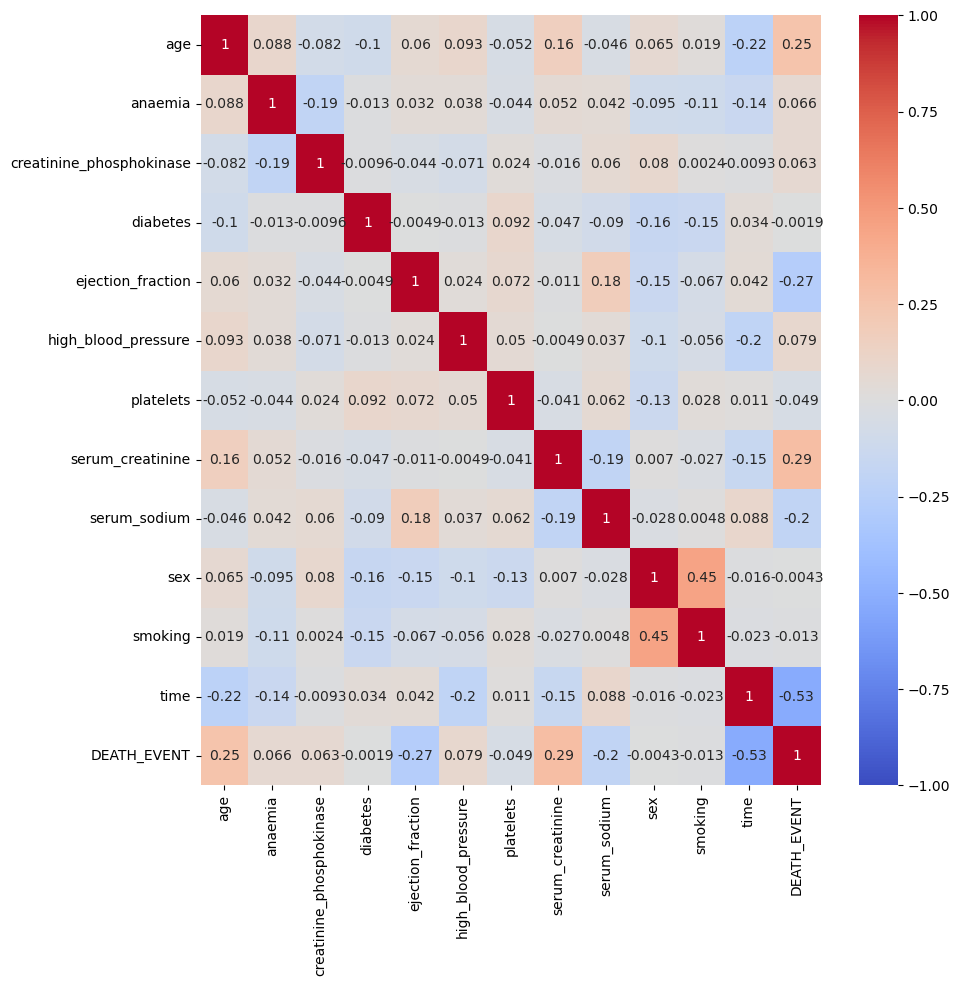

In [10]:
#Feature 간 correlation을 heatmap으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True)

Data Scaling

* 각 feature간의 값의 범위가 차이가 있기 때문에 하나의 기준을 따를 수 있도록 스케일링 시행 (단, Categorical 변수는 제외함)

* 평균이 0 , 분산이 1로 조정해 주는 StandardScaler 사용

In [36]:
x = data.drop(['DEATH_EVENT', 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis = 1) 
x_categorical = data[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']] #categorical 변수 제외
y = data['DEATH_EVENT']

scaler = StandardScaler()
X = scaler.fit_transform(x)
y = np.array(y)

df = pd.DataFrame(X, columns = x.columns.values.tolist())
df = pd.concat([df, x_categorical], axis=1)

X = np.array(df)

Data Split
* Train:Val:Test = 6:2:2

In [37]:
#for machine learning model
X_tr_ml, X_te_ml, y_tr_ml, y_te_ml = train_test_split(X, y, test_size=0.2, random_state=20)
X_tr_ml, X_val_ml, y_tr_ml, y_val_ml = train_test_split(X_tr_ml, y_tr_ml, test_size=0.25, random_state=20)

### Model Construction

* 각 모델별 하이퍼 파라미터 튜닝을 위해 GridSearchCV 사용
* GridSearchCV: Cross-Validation을 기반으로 하이퍼 파라미터를 순차적으로 측정하며, 가장 좋은 파라미터를 알려 줌

Logistic Regression

In [38]:
model_lr = LogisticRegression()

Decision Tree

In [39]:
model_dt = DecisionTreeClassifier()

grid = {'min_samples_split': [5, 10, 20, 50, 100],
       'max_depth': [5, 10, 15, 20]}

model_dt = GridSearchCV(model_dt, grid, cv=5)

SVC

In [40]:
model_svc = SVC()

grid = {'kernel': ['linear','rbf','poly']}

model_svc = GridSearchCV(model_svc, grid, cv=5)

kNN

In [41]:
model_knn = KNeighborsClassifier() 

grid = {"n_neighbors":np.arange(1,30)}

model_knn = GridSearchCV(model_knn, grid, cv=5)

Random Forest

In [42]:
model_rf = RandomForestClassifier()

grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

model_rf = GridSearchCV(model_rf, grid, cv=5)

### Train Model

In [43]:
def accuracy(pre, y):
    return sum(pre==y)/len(y)

Logistic regression

In [44]:
model_lr.fit(X_tr_ml, y_tr_ml)

tr_pred_lr = model_lr.predict(X_tr_ml)
val_pred_lr = model_lr.predict(X_val_ml)

tr_acc_lr = accuracy_score(tr_pred_lr, y_tr_ml)
val_acc_lr = accuracy_score(val_pred_lr, y_val_ml)

print('Training Accuracy : ', tr_acc_lr)
print('Validation Accuracy : ', val_acc_lr)

Training Accuracy :  0.8547486033519553
Validation Accuracy :  0.8666666666666667


Decision Tree

In [49]:
model_dt.fit(X_tr_ml, y_tr_ml)

tr_pred_dt = model_dt.predict(X_tr_ml)
val_pred_dt = model_dt.predict(X_val_ml)

tr_acc_dt = accuracy_score(tr_pred_dt, y_tr_ml)
val_acc_dt = accuracy_score(val_pred_dt, y_val_ml)

print('Training Accuracy : ', tr_acc_dt)
print('Validation Accuracy : ', val_acc_dt)

Training Accuracy :  0.8547486033519553
Validation Accuracy :  0.8333333333333334


In [50]:
model_dt.best_params_

{'max_depth': 5, 'min_samples_split': 50}

SVC

In [51]:
model_svc.fit(X_tr_ml, y_tr_ml)

tr_pred_svc = model_svc.predict(X_tr_ml)
val_pred_svc = model_svc.predict(X_val_ml)

tr_acc_svc = accuracy_score(tr_pred_svc, y_tr_ml)
val_acc_svc = accuracy_score(val_pred_svc, y_val_ml)

print('Training Accuracy : ', tr_acc_svc)
print('Validation Accuracy : ', val_acc_svc)

Training Accuracy :  0.8547486033519553
Validation Accuracy :  0.8666666666666667


In [52]:
model_svc.best_params_

{'kernel': 'linear'}

kNN

In [53]:
model_knn.fit(X_tr_ml, y_tr_ml)

tr_pred_knn = model_knn.predict(X_tr_ml)
val_pred_knn = model_knn.predict(X_val_ml)

tr_acc_knn = accuracy_score(tr_pred_knn, y_tr_ml)
val_acc_knn = accuracy_score(val_pred_knn, y_val_ml)

print('Training Accuracy : ', tr_acc_knn)
print('Validation Accuracy : ', val_acc_knn)

Training Accuracy :  0.8324022346368715
Validation Accuracy :  0.7833333333333333


In [54]:
model_knn.best_params_

{'n_neighbors': 5}

Random Forest

In [55]:
model_rf.fit(X_tr_ml, y_tr_ml)

tr_pred_rf = model_rf.predict(X_tr_ml)
val_pred_rf = model_rf.predict(X_val_ml)

tr_acc_rf = accuracy_score(tr_pred_rf, y_tr_ml)
val_acc_rf = accuracy_score(val_pred_rf, y_val_ml)

print('Training Accuracy : ', tr_acc_rf)
print('Validation Accuracy : ', val_acc_rf)

Training Accuracy :  1.0
Validation Accuracy :  0.9


In [56]:
model_rf.best_params_

{'max_depth': 10, 'n_estimators': 300}

Neural Network

In [58]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=20)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=20)

In [59]:
from torch import nn

# Model Construction
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=12, out_features=128)
        self.layer_2 = nn.Linear(in_features=128, out_features=256)
        self.layer_3 = nn.Linear(in_features=256, out_features=128)
        self.layer_4 = nn.Linear(in_features=128, out_features=1)

        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Intersperse the ReLU activation function between layers
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_4(x)
        return x
    

# loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an instance of the model and send it to target device
model_linear = LinearModel()
model_linear

# Create an optimizer
optimizer = torch.optim.Adam(params=model_linear.parameters(), lr=0.001, weight_decay=0.01)

In [32]:
# Calculate accuracy 
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [63]:
# Set the number of epochs
epochs = 100

train_acc_list = []
valid_acc_list = []
test_acc_list = []

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_linear.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_linear(X_tr).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits.to(torch.float32), # Using nn.BCEWithLogitsLoss works with raw logits
                   y_tr.to(torch.float32)) 

    acc = accuracy_fn(y_true=y_tr, 
                      y_pred=y_pred)
    train_acc_list.append(acc)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    
    ###  Validation
    model_linear.eval()
    with torch.no_grad():
        # 1. Forward pass
        valid_logits = model_linear(X_val).squeeze() 
        valid_pred = torch.round(torch.sigmoid(valid_logits))
        
        # 2. Caculate loss/accuracy
        valid_loss = loss_fn(valid_logits.to(torch.float32),
                            y_val.to(torch.float32))
        
        valid_acc = accuracy_fn(y_true=y_val,
                               y_pred=valid_pred)
        valid_acc_list.append(valid_acc)
    
    ### Testing
    model_linear.eval()
    with torch.no_grad():
        # 1. Forward pass
        test_logits = model_linear(X_te).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits.to(torch.float32),
                            y_te.to(torch.float32))
        
        test_acc = accuracy_fn(y_true=y_te,
                               y_pred=test_pred)
        test_acc_list.append(test_acc)

    # Print out what's happening every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f"====[Epoch {epoch}]====")
        print(f"Training Loss: {loss:.5f}, Training Accuracy: {acc:.2f}% | Valid loss: {valid_loss:.5f}, Valid acc: {valid_acc:.2f}%")
        print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

valid_acc_list, test_acc_list = np.array(valid_acc_list), np.array(test_acc_list)
best_epoch = np.argmax(valid_acc_list)
best_train_acc = train_acc_list[best_epoch] * 0.01
best_valid_acc = valid_acc_list[best_epoch] * 0.01
best_test_acc = test_acc_list[best_epoch] * 0.01

print('\n\n[Best model information]')
print(f'Epoch at {best_epoch}')
print(f'Training accuracy of the best model : {best_train_acc:.5f}')
print(f'Validation accuracy of the best model : {best_valid_acc:.5f}')
print(f'Test accuracy of the best model : {best_test_acc:.5f}')

====[Epoch 9]====
Training Loss: 0.03850, Training Accuracy: 100.00% | Valid loss: 0.56547, Valid acc: 86.67%
Test loss: 1.23712, Test acc: 71.67%
====[Epoch 19]====
Training Loss: 0.03765, Training Accuracy: 100.00% | Valid loss: 0.56980, Valid acc: 86.67%
Test loss: 1.23689, Test acc: 71.67%
====[Epoch 29]====
Training Loss: 0.03688, Training Accuracy: 100.00% | Valid loss: 0.57419, Valid acc: 86.67%
Test loss: 1.23773, Test acc: 71.67%
====[Epoch 39]====
Training Loss: 0.03610, Training Accuracy: 100.00% | Valid loss: 0.57531, Valid acc: 86.67%
Test loss: 1.23574, Test acc: 71.67%
====[Epoch 49]====
Training Loss: 0.03551, Training Accuracy: 100.00% | Valid loss: 0.57642, Valid acc: 86.67%
Test loss: 1.23162, Test acc: 71.67%
====[Epoch 59]====
Training Loss: 0.03494, Training Accuracy: 100.00% | Valid loss: 0.57619, Valid acc: 86.67%
Test loss: 1.23013, Test acc: 71.67%
====[Epoch 69]====
Training Loss: 0.03447, Training Accuracy: 100.00% | Valid loss: 0.57776, Valid acc: 86.67%
Te

---

## Select Model

In [67]:
#모델별 accuracy 평가
data_dic = {'Logistic Regression': [tr_acc_lr, val_acc_lr], 'KNN': [tr_acc_knn, val_acc_knn], 'Decision Tree': [tr_acc_dt, val_acc_dt], 'Random Forest': [tr_acc_rf, val_acc_rf], 'SVC': [tr_acc_svc, val_acc_svc], 'Deep Learning': [best_train_acc, best_valid_acc]}
df_acc = pd.DataFrame.from_dict(data_dic, orient = 'index', columns = ['Train Accuracy', 'Validation Accuracy'])
df_acc.style.highlight_max(axis=0)

,Train Accuracy,Validation Accuracy
Logistic Regression,0.854749,0.866667
KNN,0.832402,0.783333
Decision Tree,0.854749,0.833333
Random Forest,1.000000,0.900000
SVC,0.854749,0.866667
Deep Learning,1.000000,0.866667


## Performance

In [68]:
#Test data에 대한 accuracy 평가
te_pred_rf = model_rf.predict(X_te)
te_acc_rf = accuracy_score(te_pred_rf, y_te)
print('Test Accuracy of Random Forest : ', te_acc_rf)

Test Accuracy of Random Forest :  0.8166666666666667


Random Forest-Feature Importance

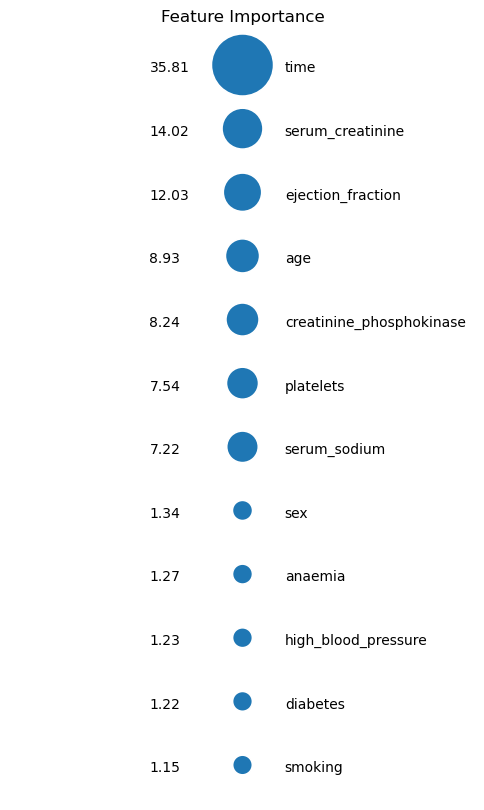

In [69]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

rf = RandomForestClassifier(n_estimators=400, max_depth=10,random_state=11)
rf.fit(X,y)
feat_imp = pd.DataFrame(rf.feature_importances_)
feat_imp.index = pd.Series(data.iloc[:,:-1].columns)
feat_imp = (feat_imp*100).copy().sort_values(by=0,ascending=False)
feat_imp = feat_imp.reset_index()
feat_imp.columns = ["Feature","Importance_score"]

fig = plt.figure(figsize=(6,10))
sns.scatterplot(data=feat_imp,x=5,y=np.linspace(100,0,12),size="Importance_score",sizes=(200,2000),legend=False)
for i,feat,imp in zip(np.linspace(100,0,12),feat_imp["Feature"],feat_imp["Importance_score"]):
    plt.text(x=5.05,y=i-1,s=feat)
    plt.text(x=4.89,y=i-1,s=np.round(imp,2))
plt.axis("off")
plt.title("Feature Importance")
plt.show()